In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import sklearn
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.tree
import sklearn.linear_model
import sklearn.ensemble
from sklearn.tree import DecisionTreeClassifier

##UPLOADING AND DISPLAYING CSV FILE

In [16]:
df=pd.read_csv('DSSAproject.csv')
df_encoded=df.copy()
df.head()


,StudentNo,Job_AG,Failed_M,ExtraYear,CoursePrice,Faculty,Gender,Current_LS
0,101,N,Y,N,80000.0,Science,F,Y
1,102,Y,Y,N,80000.0,Economics,F,Y
2,103,N,NaN,N,72000.0,Science,M,NaN
3,104,N,N,Y,96000.0,Humanities,M,N
4,105,Y,Y,Y,NaN,Humanities,M,Y


##SHOW MISSING VALUES IN DATA

In [19]:
df.isnull().sum()

StudentNo      0
Job_AG         0
Failed_M       1
ExtraYear      1
CoursePrice    1
Faculty        0
Gender         1
Current_LS     1
dtype: int64

##PREPROCESSING STEP: REPLACE MISSING DATA

In [21]:
df['Failed_M']=df['Failed_M'].fillna(df['Failed_M'].mode()[0])
df['Current_LS']=df['Current_LS'].fillna(df['Current_LS'].mode()[0])
df['ExtraYear']=df['ExtraYear'].fillna(df['ExtraYear'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['CoursePrice']=df['CoursePrice'].fillna(df['CoursePrice'].mean())

In [ ]:
ENCODING DATA

In [23]:
df_encoded=df.copy()
label_encoders={}
for column in ['Failed_M','Current_LS','ExtraYear','Gender']:
    le=LabelEncoder()
    df_encoded[column]=le.fit_transform(df_encoded[column])
    label_encoders[column]=le

DISPLAYING ENCODED DATA

In [39]:
from sklearn.preprocessing import LabelEncoder
cols=['Job_AG','Failed_M','ExtraYear','Faculty','Gender','Current_LS']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [41]:
df.head()

,StudentNo,Job_AG,Failed_M,ExtraYear,CoursePrice,Faculty,Gender,Current_LS
0,101,0,1,0,80000.000000,4,0,1
1,102,1,1,0,80000.000000,0,0,1
2,103,0,1,0,72000.000000,4,1,1
3,104,0,0,1,96000.000000,2,1,0
4,105,1,1,1,99333.333333,2,1,1


##TRAIN TEST DATA SPLIT

In [43]:
df_encoded=df.copy()
from sklearn.model_selection import train_test_split
X=df_encoded.drop(['Gender','CoursePrice','StudentNo','Current_LS'], axis=1)
y=df_encoded['Current_LS']
X_train , X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=5)

##APPLY DECISION TREAA CALSSIFICATION MODEL

In [45]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=0)

##TEST MODEL

In [47]:
y_pred=model.predict(X_test)

GET ACCURACY SCORE OF MODEL

In [49]:
from sklearn.metrics import accuracy_score
print('The accuracy for the UNAM loan prediction model is :', accuracy_score(y_test,y_pred)*100)

The accuracy for the UNAM loan prediction model is : 50.0


##VISUALIZE MODEL

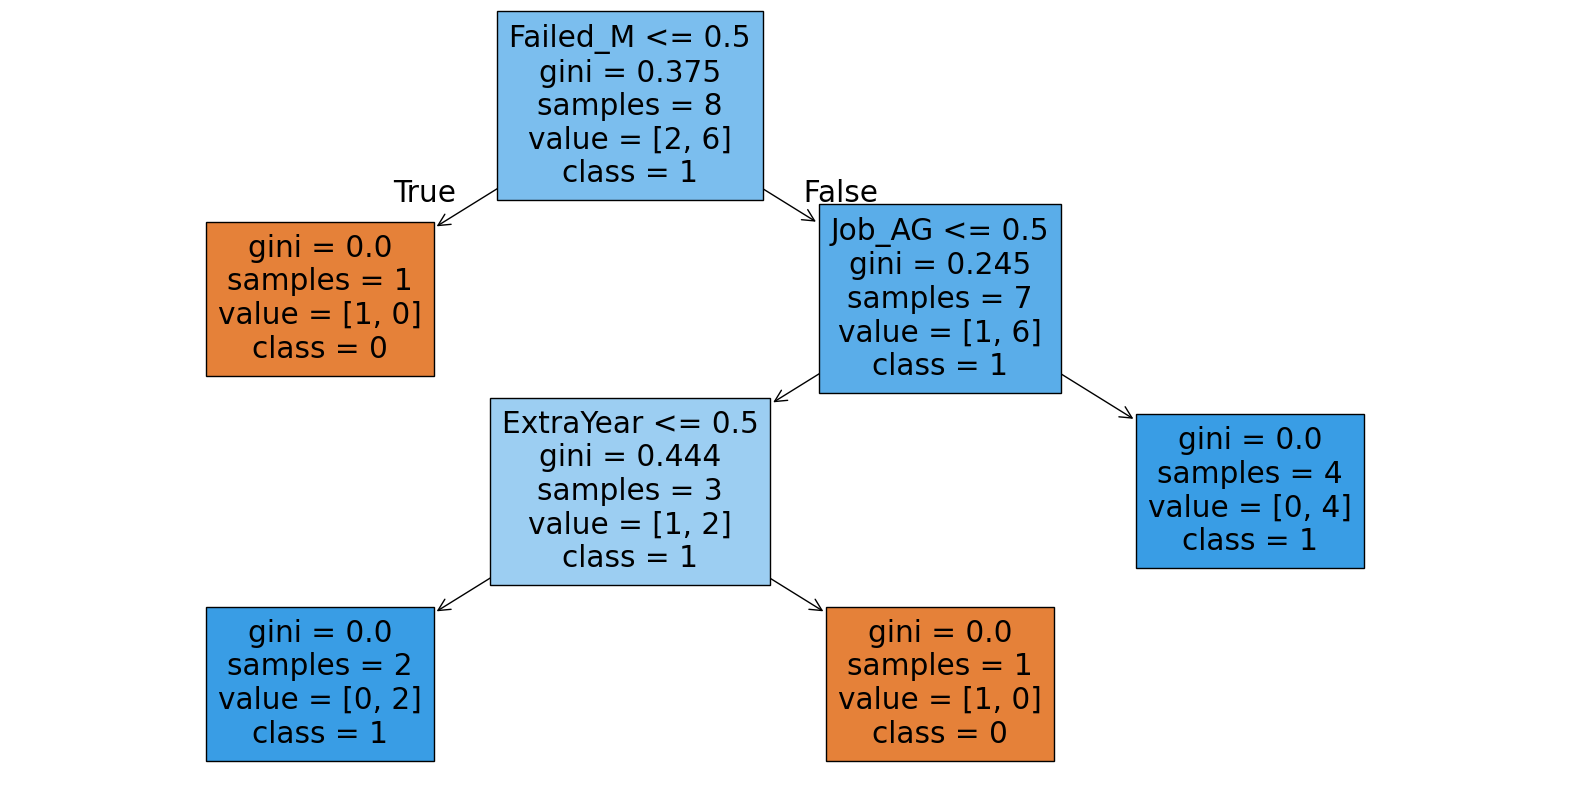

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model,feature_names= X.columns , class_names=[str(c) for c in model.classes_], filled=True)
plt.show()